# Qctrl analysis of state population probabilties
### during optimized CCZ pulses

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import qctrlvisualizer as qv
#import boulderopal as bo
import pickle

with open('Rabi50_noNN_resultz.pickle', 'rb') as handle:
    noNN = pickle.load(handle)

with open('Rabi50_resultz.pickle', 'rb') as handle:
    CCZz = pickle.load(handle)

plt.style.use(qv.get_qctrl_style())
controls_for_plots = lambda opt: {
    '$\\Delta$': opt['output']['delta'],
    '$\\Omega$': opt['output']['omega'],
    '$\\Phi$': opt['output']['phi']
}

# Dictionary for 27x27 Hamiltonian indexing

Hidx27 ={}
Hidx27['000'] = 0
Hidx27['100'] = 1
Hidx27['r00'] = 2
Hidx27['001'] = 3
Hidx27['00r'] = 4
Hidx27['101'] = 5
Hidx27['r01'] = 6
Hidx27['10r'] = 7
Hidx27['r0r'] = 8
Hidx27['010'] = 9
Hidx27['0r0'] = 10
Hidx27['110'] = 11
Hidx27['1r0'] = 12
Hidx27['r10'] = 13
Hidx27['rr0'] = 14
Hidx27['011'] = 15
Hidx27['0r1'] = 16
Hidx27['01r'] = 17
Hidx27['0rr'] = 18
Hidx27['111'] = 19
Hidx27['1r1'] = 20
Hidx27['r11'] = 21
Hidx27['11r'] = 22
Hidx27['r1r'] = 23
Hidx27['rr1'] = 24
Hidx27['1rr'] = 25
Hidx27['rrr'] = 26

# All A* terms handled by hermitian_part call later and not encoded here
# NN Hamiltonian
drive_operator = np.zeros((27, 27))
detuneDiag = np.zeros(27)
drive_operator[Hidx27['100'], Hidx27['r00']] = 1
detuneDiag[Hidx27['r00']] = 1
drive_operator[Hidx27['001'], Hidx27['00r']] = 1
detuneDiag[Hidx27['00r']] = 1
drive_operator[Hidx27['101'], Hidx27['r01']] = 1
drive_operator[Hidx27['101'], Hidx27['10r']] = 1
drive_operator[Hidx27['r01'], Hidx27['r0r']] = 1
detuneDiag[Hidx27['r01']] = 1
drive_operator[Hidx27['10r'], Hidx27['r0r']] = 1
detuneDiag[Hidx27['10r']] = 1
detuneDiag[Hidx27['r0r']] = 2
drive_operator[Hidx27['010'], Hidx27['0r0']] = 1
detuneDiag[Hidx27['0r0']] = 1
drive_operator[Hidx27['110'], Hidx27['r10']] = 1
drive_operator[Hidx27['110'], Hidx27['1r0']] = 1
drive_operator[Hidx27['1r0'], Hidx27['rr0']] = 1
detuneDiag[Hidx27['1r0']] = 1
drive_operator[Hidx27['r10'], Hidx27['rr0']] = 1
detuneDiag[Hidx27['r10']] = 1
detuneDiag[Hidx27['rr0']] = 2
drive_operator[Hidx27['011'], Hidx27['0r1']] = 1
drive_operator[Hidx27['011'], Hidx27['01r']] = 1
drive_operator[Hidx27['0r1'], Hidx27['0rr']] = 1
detuneDiag[Hidx27['0r1']] = 1
drive_operator[Hidx27['01r'], Hidx27['0rr']] = 1
detuneDiag[Hidx27['01r']] = 1
detuneDiag[Hidx27['0rr']] = 2
drive_operator[Hidx27['111'], Hidx27['r11']] = 1
drive_operator[Hidx27['111'], Hidx27['1r1']] = 1
drive_operator[Hidx27['111'], Hidx27['11r']] = 1
drive_operator[Hidx27['1r1'], Hidx27['rr1']] = 1
drive_operator[Hidx27['1r1'], Hidx27['1rr']] = 1
detuneDiag[Hidx27['1r1']] = 1
drive_operator[Hidx27['r11'], Hidx27['rr1']] = 1
drive_operator[Hidx27['r11'], Hidx27['r1r']] = 1
detuneDiag[Hidx27['r11']] = 1
drive_operator[Hidx27['11r'], Hidx27['r1r']] = 1
drive_operator[Hidx27['11r'], Hidx27['1rr']] = 1
detuneDiag[Hidx27['11r']] = 1
drive_operator[Hidx27['r1r'], Hidx27['rrr']] = 1
detuneDiag[Hidx27['r1r']] = 2
drive_operator[Hidx27['rr1'], Hidx27['rrr']] = 1
detuneDiag[Hidx27['rr1']] = 2
drive_operator[Hidx27['1rr'], Hidx27['rrr']] = 1
detuneDiag[Hidx27['1rr']] = 2
detuneDiag[Hidx27['rrr']] = 3

NN_detuning_operator = np.diag(detuneDiag)
NN_drive_operator=drive_operator
# Blockade interactions

Blockade = 50 * 2 * np.pi * 1e9 # 50 GHz * µm^6

# next nearest neighbor
blockN3 = np.zeros(27)
blockN3[[Hidx27['r0r'],Hidx27['r1r'],Hidx27['rrr']]] = Blockade
blockN3 = np.diag(blockN3)

# nearest neighbor
blockNN = np.zeros(27)
blockNN[[Hidx27['0rr'],Hidx27['1rr'],Hidx27['rr0'],Hidx27['rr1']]] = Blockade
blockNN[Hidx27['rrr']] = 2*Blockade
blockNN = np.diag(blockNN)
# plt.imshow(blockNN)
# plt.title("NN")
# plt.show()
# plt.imshow(blockN3)
# plt.title("NNN")
# plt.show()
# plt.imshow(NN_drive_operator)
# plt.title("NN Drive")
# plt.show()
# plt.imshow(NN_detuning_operator)
# plt.title("NN Detune")
# plt.show()

# NO NN terms
drive_operator = np.zeros((27, 27))
detuneDiag = np.zeros(27)
drive_operator[Hidx27['100'], Hidx27['r00']] = 1
detuneDiag[Hidx27['r00']] = 1
drive_operator[Hidx27['001'], Hidx27['00r']] = 1
detuneDiag[Hidx27['00r']] = 1
drive_operator[Hidx27['101'], Hidx27['r01']] = 1
drive_operator[Hidx27['101'], Hidx27['10r']] = 1
drive_operator[Hidx27['r01'], Hidx27['r0r']] = 1
detuneDiag[Hidx27['r01']] = 1
drive_operator[Hidx27['10r'], Hidx27['r0r']] = 1
detuneDiag[Hidx27['10r']] = 1
detuneDiag[Hidx27['r0r']] = 2
drive_operator[Hidx27['010'], Hidx27['0r0']] = 1
detuneDiag[Hidx27['0r0']] = 1
drive_operator[Hidx27['110'], Hidx27['r10']] = 1
drive_operator[Hidx27['110'], Hidx27['1r0']] = 1
detuneDiag[Hidx27['1r0']] = 1
detuneDiag[Hidx27['r10']] = 1
drive_operator[Hidx27['011'], Hidx27['0r1']] = 1
drive_operator[Hidx27['011'], Hidx27['01r']] = 1
detuneDiag[Hidx27['0r1']] = 1
detuneDiag[Hidx27['01r']] = 1
drive_operator[Hidx27['111'], Hidx27['r11']] = 1
drive_operator[Hidx27['111'], Hidx27['1r1']] = 1
drive_operator[Hidx27['111'], Hidx27['11r']] = 1
detuneDiag[Hidx27['1r1']] = 1
drive_operator[Hidx27['r11'], Hidx27['r1r']] = 1
detuneDiag[Hidx27['r11']] = 1
drive_operator[Hidx27['11r'], Hidx27['r1r']] = 1
detuneDiag[Hidx27['11r']] = 1
detuneDiag[Hidx27['r1r']] = 2
detuning_operator = np.diag(detuneDiag)

# plt.imshow(drive_operator)
# plt.title("Drive")
# plt.show()
# plt.imshow(detuning_operator)
# plt.title("Detune")
# plt.show()

# Components for the CCZ operator.
cz_0 = np.zeros(27)
cz_0[0] = 1
cz_0 = np.diag(cz_0)

cz_1 = np.zeros(27)
cz_1[[Hidx27['100'],Hidx27['010'],Hidx27['001']]] = 1
cz_1 = np.diag(cz_1)

cz_11 = np.zeros(27)
cz_11[[Hidx27['110'],Hidx27['101'],Hidx27['011']]] = 1
cz_11 = np.diag(cz_11)

cz_111 = np.zeros(27)
cz_111[Hidx27['111']] = 1
cz_111 = np.diag(cz_111)    

HiFiPulseIDX = [0,69420]
HiFiPulseIDX_noNN = [0,69420]

for i in CCZz:
    if CCZz[i][0] < HiFiPulseIDX[1]:
        HiFiPulseIDX = [i, CCZz[i][0]]

for i in noNN:
    if noNN[i][0] < HiFiPulseIDX_noNN[1]:
        HiFiPulseIDX_noNN = [i, noNN[i][0]]

HiFiPulse = CCZz[HiFiPulseIDX[0]][1]
HiFiPulse_noNN = noNN[HiFiPulseIDX_noNN[0]][1]


In [134]:
def pulse_pop(pulse,statez,title,altlegend=None,colorz=None):
    dur = pulse['output']['duration']['value']
    sample_times = np.linspace(0, dur, 200)
    u = pulse['output']['unitary']['value']
    legendz=[]
    loc = (1.05,.8)
    for i,state in enumerate(statez):
        color = None
        psi = np.zeros(27)
        psi[Hidx27[state]] = 1
        out = np.abs(np.transpose(psi) @ u @ psi)**2
        if colorz is not None:
            color = colorz[i]
        plt.plot(sample_times*1e6, out,color=color)
        legendz.append('|'+state+'>')
    plt.xlabel('Time (µs)')
    plt.ylabel('Population')
    if altlegend is None:
        plt.legend(legendz,loc=loc)
    else:
         plt.legend(altlegend,loc=loc)
    plt.title(title)
    plt.savefig(str(legendz)+title,dpi=300,bbox_inches='tight')

    return plt.show()

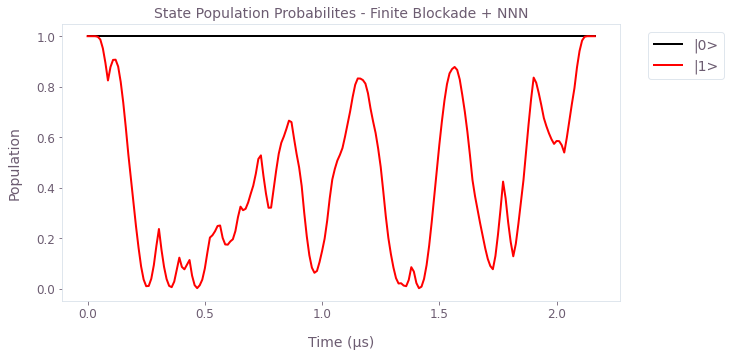

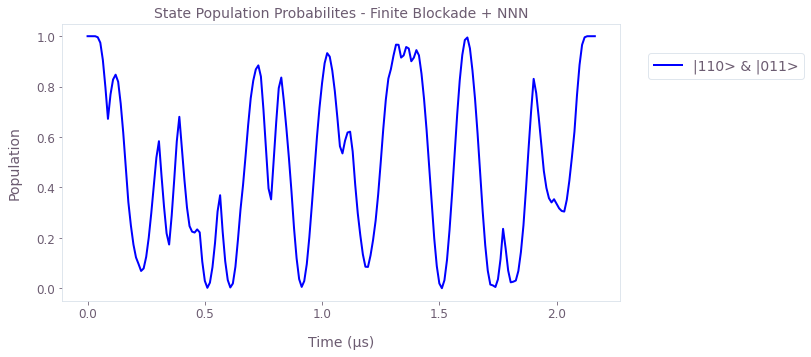

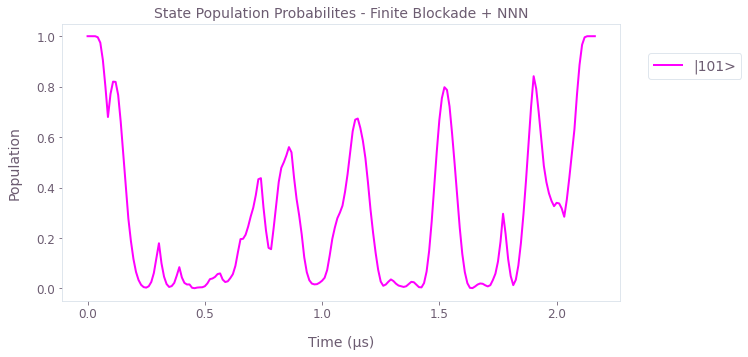

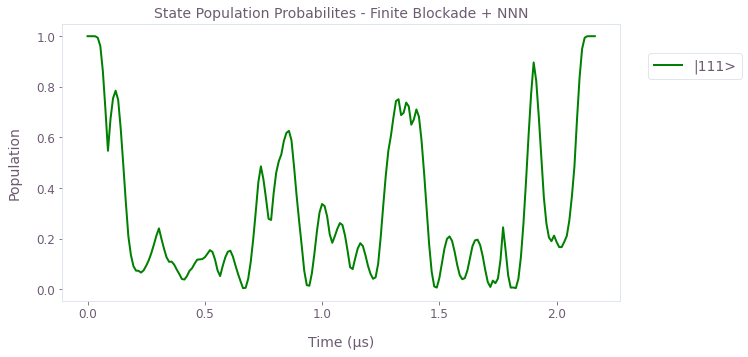

In [135]:
pulse_pop(HiFiPulse,['000','100'],"State Population Probabilites - Finite Blockade + NNN",['|0>','|1>'],['black','red'])
#pulse_pop(HiFiPulse,['110','101'],"State Population Probabilites - Finite Blockade + NNN",['|110> & |011>','|101>'],['blue','magenta'])
pulse_pop(HiFiPulse,['110'],"State Population Probabilites - Finite Blockade + NNN",['|110> & |011>'],['blue'])
pulse_pop(HiFiPulse,['101'],"State Population Probabilites - Finite Blockade + NNN",['|101>'],['magenta'])
pulse_pop(HiFiPulse,['111'],"State Population Probabilites - Finite Blockade + NNN",None,['green'])


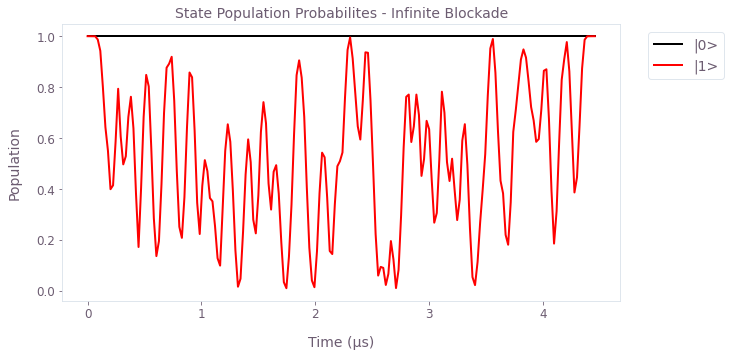

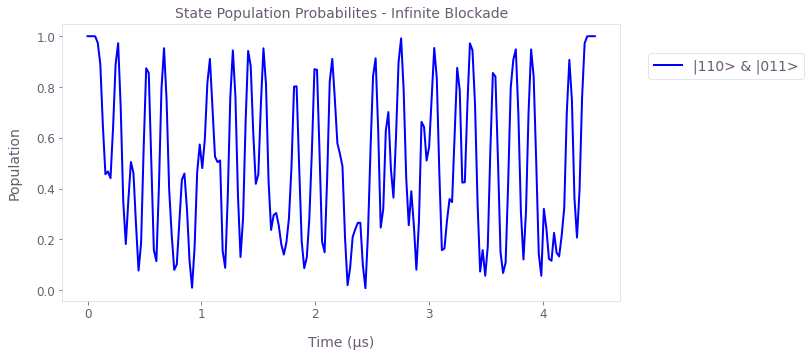

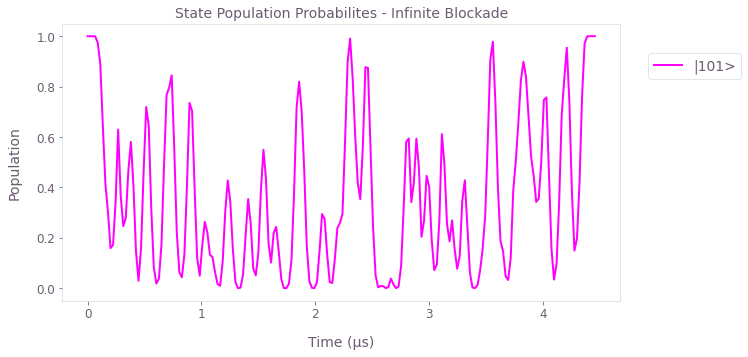

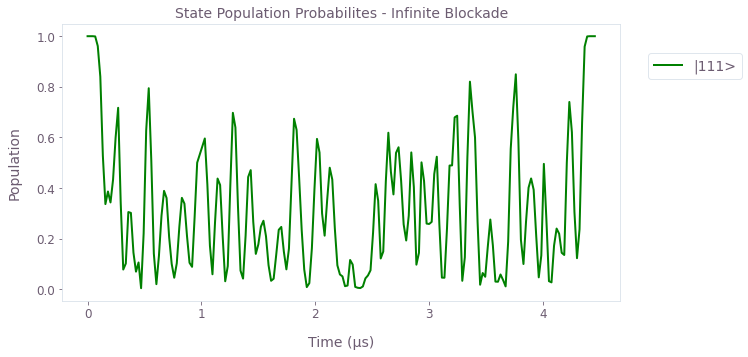

In [136]:
pulse_pop(HiFiPulse_noNN,['000','100'],"State Population Probabilites - Infinite Blockade",['|0>','|1>'],['black','red'])
pulse_pop(HiFiPulse_noNN,['110',],"State Population Probabilites - Infinite Blockade",['|110> & |011>'],['blue'])
pulse_pop(HiFiPulse_noNN,['101'],"State Population Probabilites - Infinite Blockade",['|101>'],['magenta'])

pulse_pop(HiFiPulse_noNN,['111'],"State Population Probabilites - Infinite Blockade",None,['green'])

